<a href="https://colab.research.google.com/github/domingues100/SEL0449---Computer-Vision/blob/main/Lista_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 5
### Introdução ao Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 2 exercícios. O peso considerado para a nota final da lista está descrito ao lado do enunciado.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Não retirar os enunciados da lista.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_5.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: ` Gabriel Montagni Domingues Filho

`Número USP: ` 11800903

### Introdução:

Nesta lista de exercícios vamos estudar sobre filtros aplicados no domínio da frequência. Primeiramente vamos importar as bibliotecas que iremos utilizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits import mplot3d

#### **Atenção**: os códigos abaixo são para fazer o download das imagens necessárias para a prática. EXECUTE-OS!

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/towerbridge.tif?raw=true", "towerbridge.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/arvore_mod.tif?raw=true", "arvore_mod.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### INTRODUÇÃO - Filtragem no domínio da frequência

A filtragem no domínio da frequência consiste em modificar a transformada de Fourier de uma imagem e depois calcular a transformada inversa para obter o resultado processado.

O grau de dificuldade na construção dos filtros diminui quando se trabalha no domínio da frequência, entretanto, a proximidade dos períodos na convolução pode causar o erro de wraparound (efeito de borda). Para solucionar esse problema, é necessário fazer um padding na imagem - lembrando que algoritmos DFT tendem a executar mais rapidamente arranjos de tamanho par, ou seja, normalmente se utiliza o dobro das dimensões M e N da imagem. As Figuras 1 e 2 ilustram os efeitos provocados, no borramento da imagem, tanto devido a não utilização de padding quanto da aplicação zero padding.

Lembre-se que, afim de preservar informações sobre as bordas, normalmente utiliza-se do padding simétrico, e não o padding com zeros.


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/wraparound.PNG?raw=true" style="width:836px;height:266px;"></center>

<center><caption><b> Figura 1:</b> Periodicidade inerente às imagens 2D na utilização da DFT.</b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption></br>


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/wraparound_0.PNG?raw=true" style="width:836px;height:266px;"></center>

<center><caption><b> Figura 2:</b> Em b, resultado do borramento de a sem zero padding. Em c, resultado do borramento de a com zero padding. </b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption></br>

A função [np.fft.ff2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) - utilizada na lista anterior - oferece, por meio do parâmetro s, a opção de preenchimento (padding), sendo (Mf,Nf) normalmente igual a (2*M, 2*N) tal que M e N representam as dimensões da imagem. Para mais detalhes, consulte a documentação.

```python
f = np.fft.fft2(img,s=(Mf,Nf))
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1.)
```

Atenção! Note as novas dimensões do espectro de frequência. Após a transformada inversa, será necessário recortar a imagem, resultando na imagem com as dimensões originais M e N, descartando as informações adjacentes.

### 1) Filtros PASSA-BAIXA E PASSA-ALTA no domínio da frequência (5.0/10.0)

Bordas e outras transições abruptas de intensidade (como o ruído) em uma imagem contribuem significativamente para o conteúdo de alta frequência de sua transformada de Fourier. Dessa forma, a suavização (borramento) é obtida no domínio da frequência pela atenuação das altas frequências - filtros passa-baixa.

Os filtros podem ser projetados de forma a apresentar transições mais abruptas ou mais suavizadas. Consideraremos apenas os filtros radialmente simétricos - deslocamento de fase zero - sendo D<sub>0</sub> o raio a partir da origem e n a ordem do filtro:
<p></br>

Filtro passa-baixa IDEAL:

$$ H_{LPideal}(u,v) = 1,~se~D(u,v)~\le~D0$$<br/>
$$ H_{LPideal}(u,v) = 0,~se~D(u,v)~\gt~D0$$<br/>

Filtro passa-baixa BUTTERWORTH:

$$ H_{LPButterworth}(u,v) = \frac{1}{{1+\big[\frac{D(u,v)}{D_0}}\big]^{2n}}$$<br/>

Filtro passa-baixa GAUSSIANO:

$$ H_{LPGaussiano}(u,v) = e^{\frac{-D^2(u,v)}{2D_0^2}}$$<br/>

Já o aguçamento das imagens pode ser obtido pela filtragem passa-alta, atenuando componentes de baixa frequência sem afetar as informações de alta frequência na transformada de Fourier. Os filtros passa-alta podem ser obtidos a partir dos respectivos passa-baixa, considerando a equação:

$$ H_{HP}(u,v) = 1 - H_{LP}(u,v)$$<br/>


**DICA:** para visualizar os filtros em plots 3D, você pode utilizar o toolkit já incluso na instalação da biblioteca matplotlib (incluso na importação inicial deste notebook). Para isto, é necessário manipular os dados do filtro, de forma que seja construída uma rede X-Y (contendo as coordenadas) em que serão plotadas as intensidades (Z). Considere um filtro de dimensões Mf e Nf e intensidades I. Para criar a rede, podemos utilizar o comando [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) tendo o 0 (zero) como valor inicial, Mf como valor final e com número de amostras equivalente a Mf. Da mesma forma com Nf.

A seguir, um exemplo de subplot utilizando a função plot_wireframe e plot_surface. Consulte o [link](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) para mais detalhes.

```python
x = np.linspace(0, Mf, Mf)
y = np.linspace(0, Nf, Nf)

X, Y = np.meshgrid(x, y)
Z = I

fig = plt.figure(figsize = (20,10))
fig.suptitle('Filtros 3D')

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('wireframe plot');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('surface plot');

plt.show()
```


**Exercício.** Considerando que a imagem 'towerbridge.tif' foi digitalizada com **resolução de 300DPI**, realize as seguintes tarefas: (5.0/10.0)

**a.** Visualize a imagem original e o espectro de Fourier (domínio da frequência). **Lembre-se do padding.**

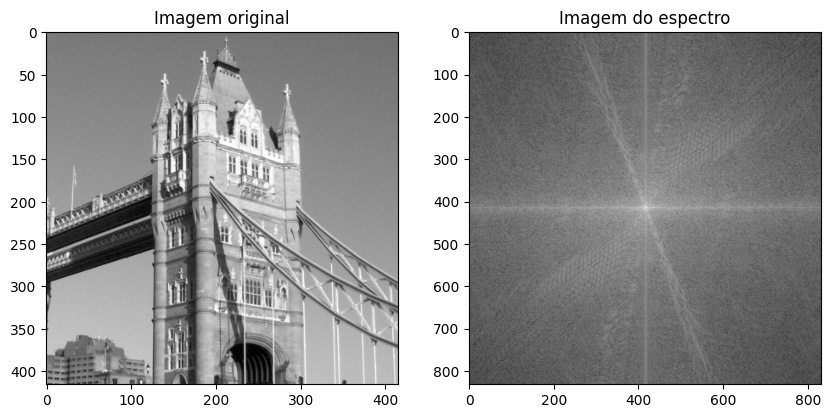

In [ ]:
## -- Seu código começa AQUI -- ##
img =cv.imread("towerbridge.tif", cv.IMREAD_UNCHANGED)

M = img.shape[0]
N = img.shape[1]

Mf = 2*M
Nf = 2*N

f = np.fft.fft2(img,s=(Mf,Nf))
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1.)

def plot(imagens, titulos):
  plt.figure(figsize=(5*len(imagens),5)) #cria uma figura 10x5 e plota a imagem original e seu espectro
  for j in range(len(imagens)):
    plt.subplot(1,len(imagens),j+1)
    plt.title(f"{titulos[j]}")
    plt.imshow(imagens[j],'gray')
  plt.show()

plot([img, magnitude_spectrum],["Imagem original", "Imagem do espectro"])
## -- Seu código termina AQUI -- ##


**b.** Crie um filtro **passa-baixa circular do tipo "Ideal"** com frequência de corte igual a 1,5 ciclos/mm. Aplicar à imagem e comentar o resultado. Mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

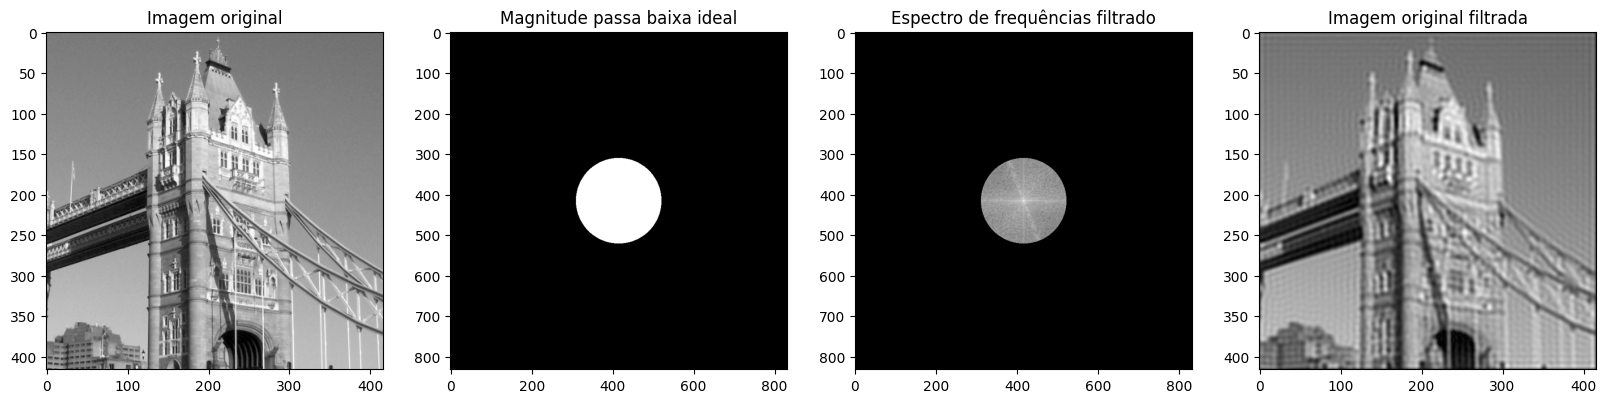

In [ ]:
## -- Seu código começa AQUI -- ##
cx = Nf//2
cy = Mf//2

dx = 25.4/300
du =1/(2*dx*M)
D0 = 1.5/du

def passa_baixa_ideal():
  filtro = np.zeros((Mf, Nf))
  for x in range(0, Mf):
    for y in range (0, Nf):
      D = np.sqrt((x-cx)**2+(y-cy)**2)
      if D < D0:
        filtro[x,y] = 1
  return filtro

def calcula_inversa(filtro): #calcula a inversa do espectro filtrado, fazendo filtro x fshift definido no item anterior
  ifiltrado = np.fft.ifftshift(filtro*fshift)
  ifiltrado = np.fft.ifft2(ifiltrado)
  ifiltrado = np.abs(ifiltrado)
  ifiltrado = ifiltrado[0:M,0:N]
  return ifiltrado

filtro = passa_baixa_ideal() #filtro passa baixa ideal
magnitude_spectrum_filtrado = 20*np.log(np.abs(filtro*fshift)+1.) #novo espectro de magnitude após fazer filtroxfshift, calcular o abs e fazer o log
imagem_original_filtrada = calcula_inversa(filtro) #calcula a inversa do filtro

plot([img, filtro, magnitude_spectrum_filtrado, imagem_original_filtrada], ["Imagem original", "Magnitude passa baixa ideal", "Espectro de frequências filtrado", "Imagem original filtrada"])

## -- Seu código termina AQUI -- ##

**c.** Crie um filtro **passa-baixa circular do tipo "Butterworth"** com n=2 e frequência de corte igual a 1,5 ciclos/mm. Aplicar à imagem e comentar o resultado.  Mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

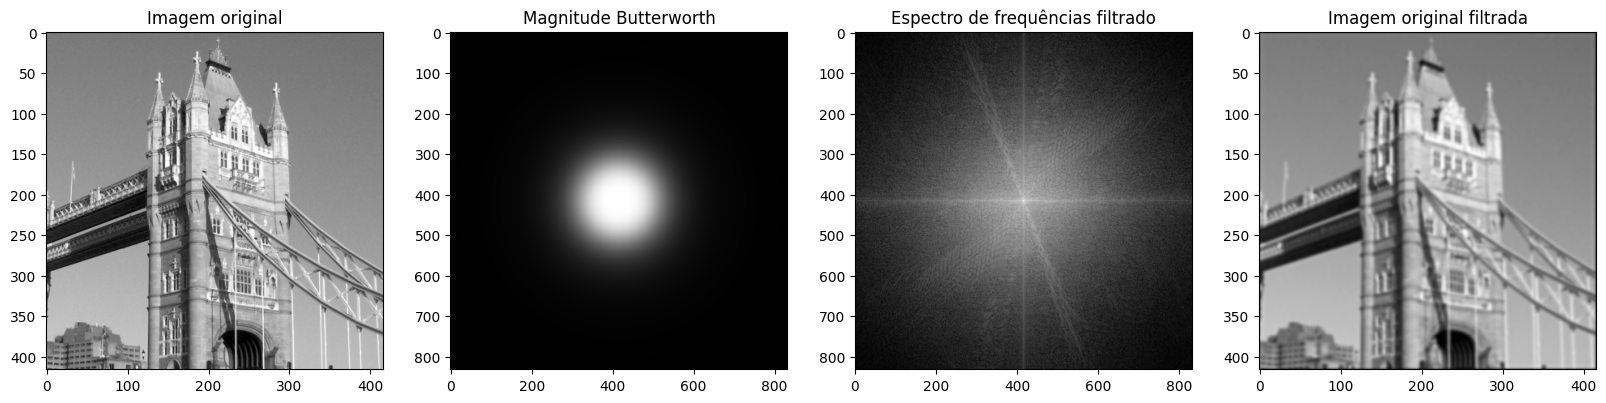

In [ ]:
## -- Seu código começa AQUI -- ##
def BUTTERWORTH():
  filtro = np.zeros((Mf, Nf))
  for x in range(0, Mf):
    for y in range (0, Nf):
      D = np.sqrt((x-cx)**2+(y-cy)**2)
      filtro[x,y] = 1/(1+(D/D0)**4)
  return filtro

filtro = BUTTERWORTH() #calcula o filtro butterworth
imagem_original_filtrada = calcula_inversa(filtro) #faz a transformada inversa do espectro filtrado obtendo a imagem filtrada
magnitude_espectrum_filtrado = 20*np.log(np.abs(filtro*fshift)+1.)

plot([img, filtro, magnitude_espectrum_filtrado, imagem_original_filtrada], ["Imagem original", "Magnitude Butterworth", "Espectro de frequências filtrado", "Imagem original filtrada"])

## -- Seu código termina AQUI -- ##

**d.** Crie um filtro **passa-baixa circular do tipo "Gaussiano"** com frequência de corte igual a 1,5 ciclos/mm. Aplicar à imagem e comentar o resultado.  Mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

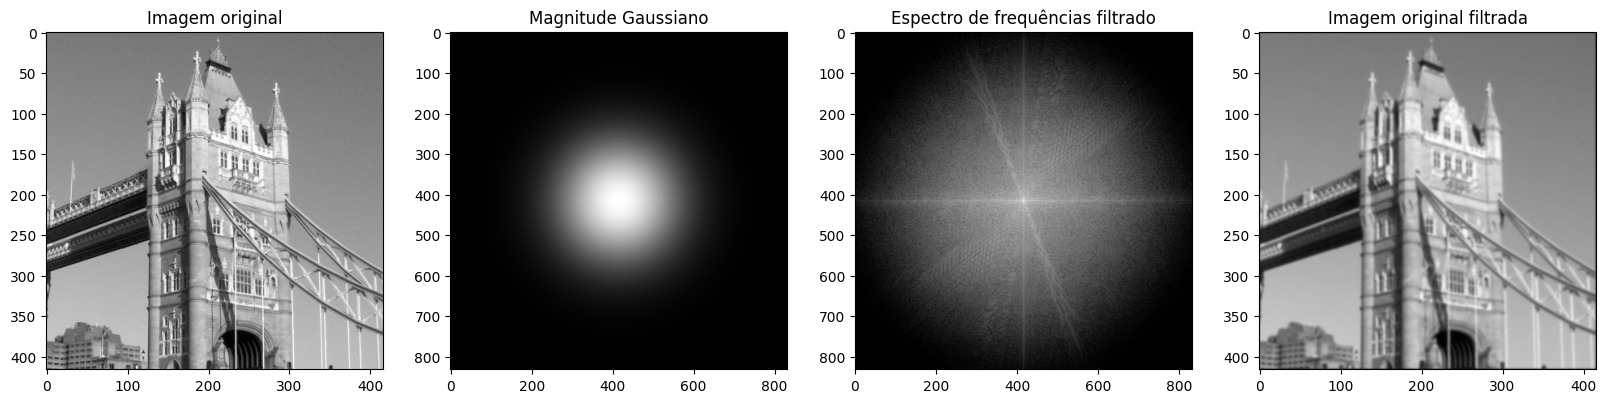

In [ ]:
## -- Seu código começa AQUI -- ##
def GAUSSIANO():
  filtro = np.zeros((Mf, Nf))
  for x in range(0, Mf):
    for y in range (0, Nf):
      D = np.sqrt((x-cx)**2+(y-cy)**2)
      filtro[x,y] = np.exp((-(D**2)/(2*(D0**2))))
  return filtro

filtro = GAUSSIANO()
imagem_original_filtrada = calcula_inversa(filtro) #faz a transformada inversa do espectro filtrado obtendo a imagem filtrada
magnitude_espectrum_filtrado_gaussiano = 20*np.log(np.abs(filtro*fshift)+1.)

plot([img, filtro, magnitude_espectrum_filtrado_gaussiano, imagem_original_filtrada], ["Imagem original", "Magnitude Gaussiano", "Espectro de frequências filtrado", "Imagem original filtrada"])

## -- Seu código termina AQUI -- ##

**e.** Crie os **filtros passa-alta** com as mesmas frequências de corte e características especificadas em b, c e d. Em cada um, mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

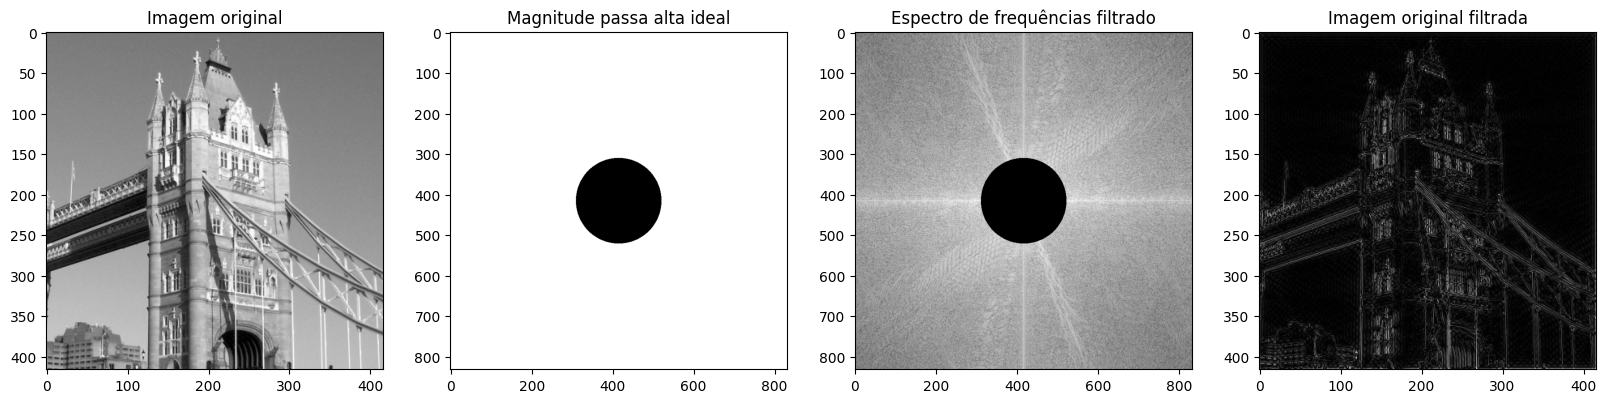

In [ ]:
## -- Seu código começa AQUI -- ##
def passa_alta_ideal():
  filtro = np.zeros((Mf, Nf))
  for x in range(0, Mf):
    for y in range (0, Nf):
      D = np.sqrt((x-cx)**2+(y-cy)**2)
      if D > D0:
        filtro[x,y] = 1
  return filtro

filtro = passa_alta_ideal()
imagem_original_filtrada = calcula_inversa(filtro) #faz a transformada inversa do espectro filtrado obtendo a imagem filtrada
magnitude_espectrum_filtrado_passa_alta= 20*np.log(np.abs(filtro*fshift)+1.)

plot([img, filtro, magnitude_espectrum_filtrado_passa_alta, imagem_original_filtrada], ["Imagem original", "Magnitude passa alta ideal", "Espectro de frequências filtrado", "Imagem original filtrada"])

## -- Seu código termina AQUI -- ##

<ipython-input-9-fe973f4de4b1>:7: RuntimeWarning: divide by zero encountered in double_scalars
  filtro[x,y] = 1/(1+(D0/D)**4)


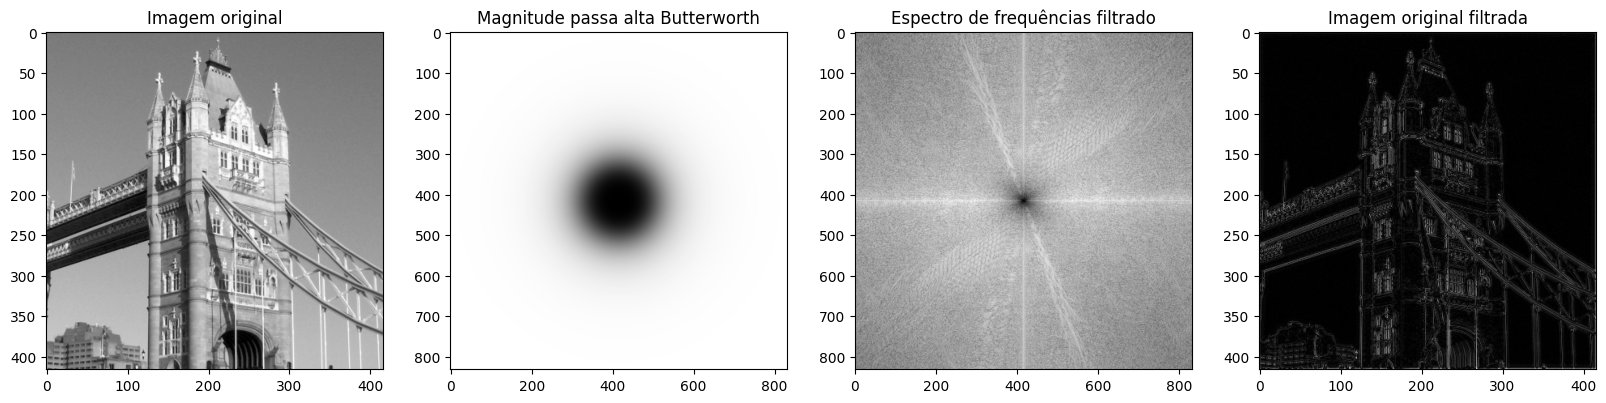

In [ ]:
## -- Seu código começa AQUI -- ##
def BUTTERWORTH_PASSA_ALTA():
  filtro = np.zeros((Mf, Nf))
  for x in range(0, Mf):
    for y in range (0, Nf):
      D = np.sqrt((x-cx)**2+(y-cy)**2)
      filtro[x,y] = 1/(1+(D0/D)**4)
  return filtro

filtro_passa_alta_butter = BUTTERWORTH_PASSA_ALTA()
imagem_original_filtrada = calcula_inversa(filtro_passa_alta_butter) #faz a transformada inversa do espectro filtrado obtendo a imagem filtrada
magnitude_espectrum_filtrado_passa_alta_butter = 20*np.log(np.abs(filtro_passa_alta_butter*fshift)+1.)

plot([img, filtro_passa_alta_butter, magnitude_espectrum_filtrado_passa_alta_butter, imagem_original_filtrada], ["Imagem original", "Magnitude passa alta Butterworth", "Espectro de frequências filtrado", "Imagem original filtrada"])
## -- Seu código termina AQUI -- ##

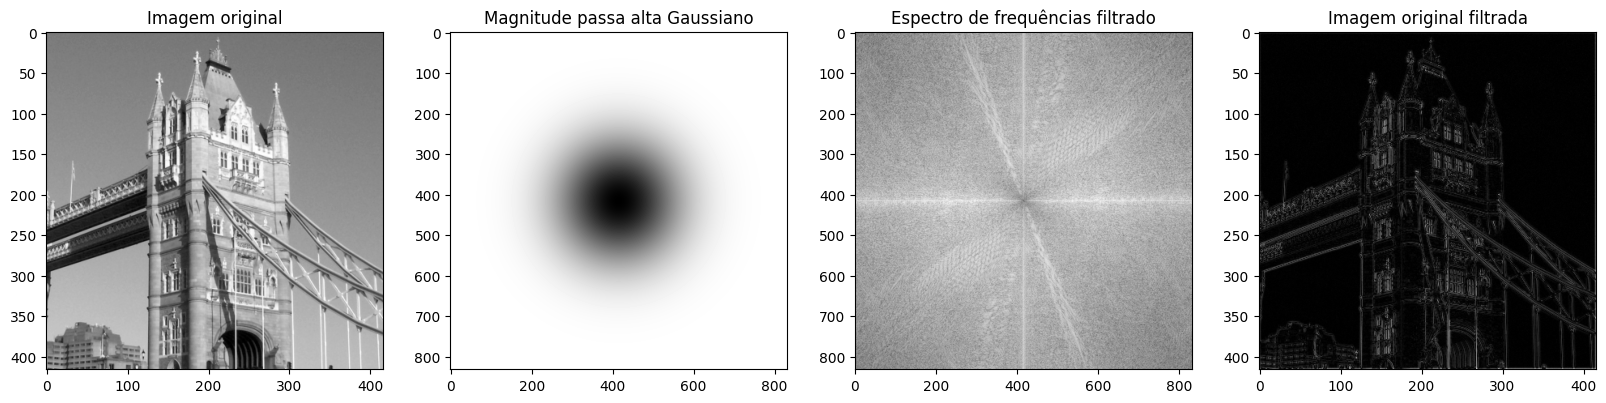

In [ ]:
## -- Seu código começa AQUI -- ##
filtro = GAUSSIANO()
filtro_passa_alta_gaussiano = 1 - filtro

imagem_original_filtrada = calcula_inversa(filtro_passa_alta_gaussiano) #faz a transformada inversa do espectro filtrado obtendo a imagem filtrada
magnitude_espectrum_filtrado_passa_alta_gaussiano = 20*np.log(np.abs(filtro_passa_alta_gaussiano*fshift)+1.)

plot([img, filtro_passa_alta_gaussiano, magnitude_espectrum_filtrado_passa_alta_gaussiano, imagem_original_filtrada], ["Imagem original", "Magnitude passa alta Gaussiano", "Espectro de frequências filtrado", "Imagem original filtrada"])

## -- Seu código termina AQUI -- ##

In [ ]:
# COMENTÁRIOS:.
# Os filtros passa_baixa apresentam espectro de frequências após a filtragem diferentes, como esperado. A imagem filtrada do passa baixa ideal tem algumas ondulações, nos filtros butterworth e gaussiano, a imagem ficou mais "limpa"
# Nesses 2 casos, apesar dos espectros filtrados diferentes, a imagem filtrada ficou muito parecida.
# Nos passa alta, é perceptível que a região central do filtro começa a ficar mais borrada ao passar do ideal->butterworth->gaussiano, como já era esperado, devido as equações de cada. Ao filtrar o espectro, repara-se que
# a região preta tende a diminuir ao seguir ios filtros ideal->butterworth->gaussiano. A imagem final resulta em uma imagem com ondoluções, mas ainda apresentando as bordas da figura para o ideal, e para o butterworth e gaussiano
# as bordas ficaram bem realçadase a imagem "limpa". Essas imagens filtradas para os 2 ultimos casos ficaram muito parecidas, apenas com alguns pqequenos detalhes diferentes.

**f.** Visualize os filtros PASSA-BAIXA e PASSA-ALTA criados (nos itens acima) em plots 3D (Wireframe e Surface).

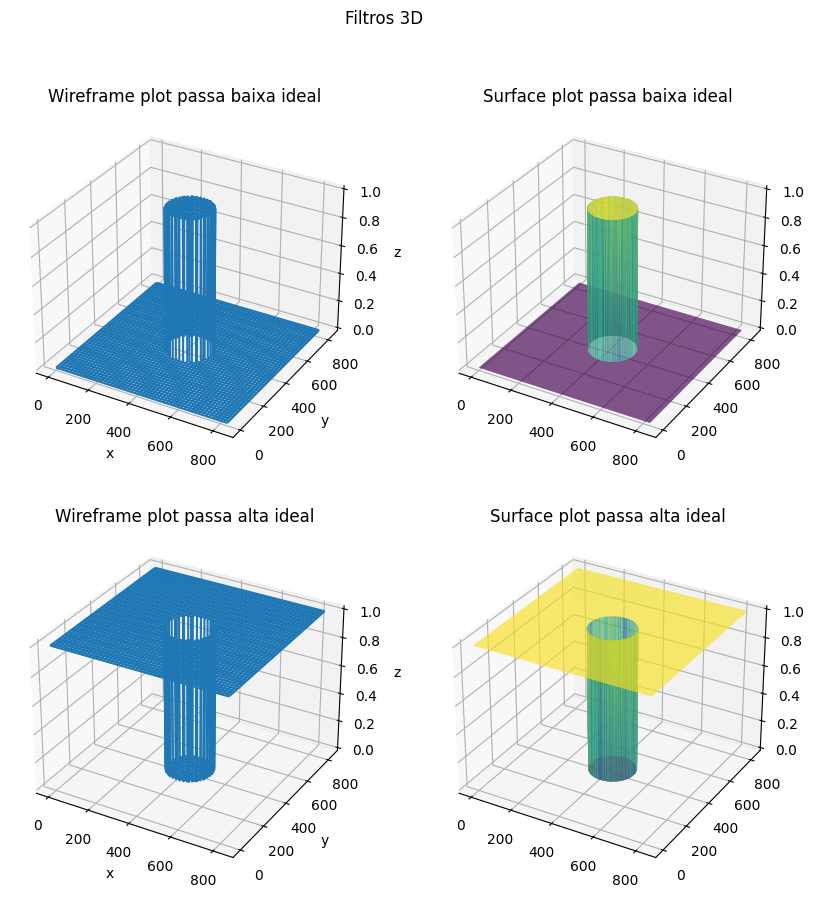

In [ ]:
## FILTROS IDEAIS
## -- Seu código começa AQUI -- ##
def plot3D(z, title): #função para fazer o plot 3D sem ter que repetir o código todas as vezes
  x = np.linspace(0, Mf, Mf)
  y = np.linspace(0, Nf, Nf)
  X, Y = np.meshgrid(x, y)
  fig = plt.figure(figsize = (5*len(z),10))
  fig.suptitle('Filtros 3D')

  for j in range(len(z)):
    Z = z[j]
    ax = fig.add_subplot(2, 2, 2*j+1, projection='3d')
    ax.plot_wireframe(X,Y,Z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'Wireframe plot {title[j]}');
    ax = fig.add_subplot(2, 2, 2*j+2, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
    ax.set_title(f'Surface plot {title[j]}');

  plt.show()

plot3D([passa_baixa_ideal(), passa_alta_ideal()],["passa baixa ideal","passa alta ideal"])#utilizando a função para o plot 3D dos filtros ideais

## -- Seu código termina AQUI -- #

<ipython-input-9-fe973f4de4b1>:7: RuntimeWarning: divide by zero encountered in double_scalars
  filtro[x,y] = 1/(1+(D0/D)**4)


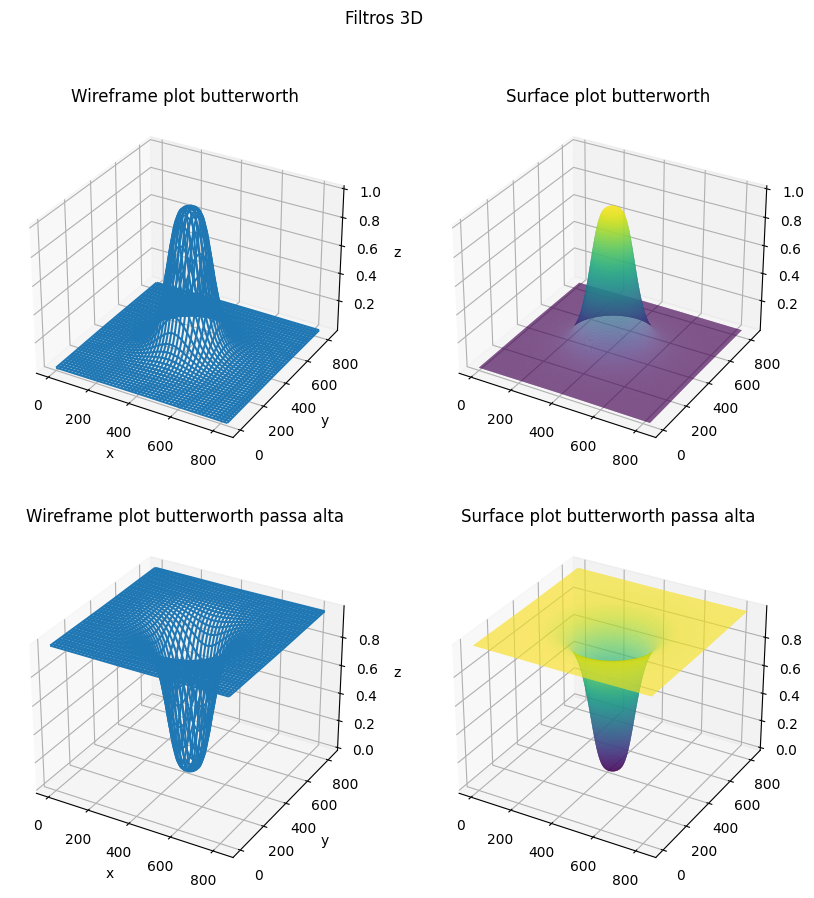

In [ ]:
## FILTROS BUTTERWORTH
## -- Seu código começa AQUI -- ##
plot3D([BUTTERWORTH(), BUTTERWORTH_PASSA_ALTA()],["butterworth","butterworth passa alta"])#utilizando a função para o plot 3D dos filtros butterworth
## -- Seu código termina AQUI -- ##

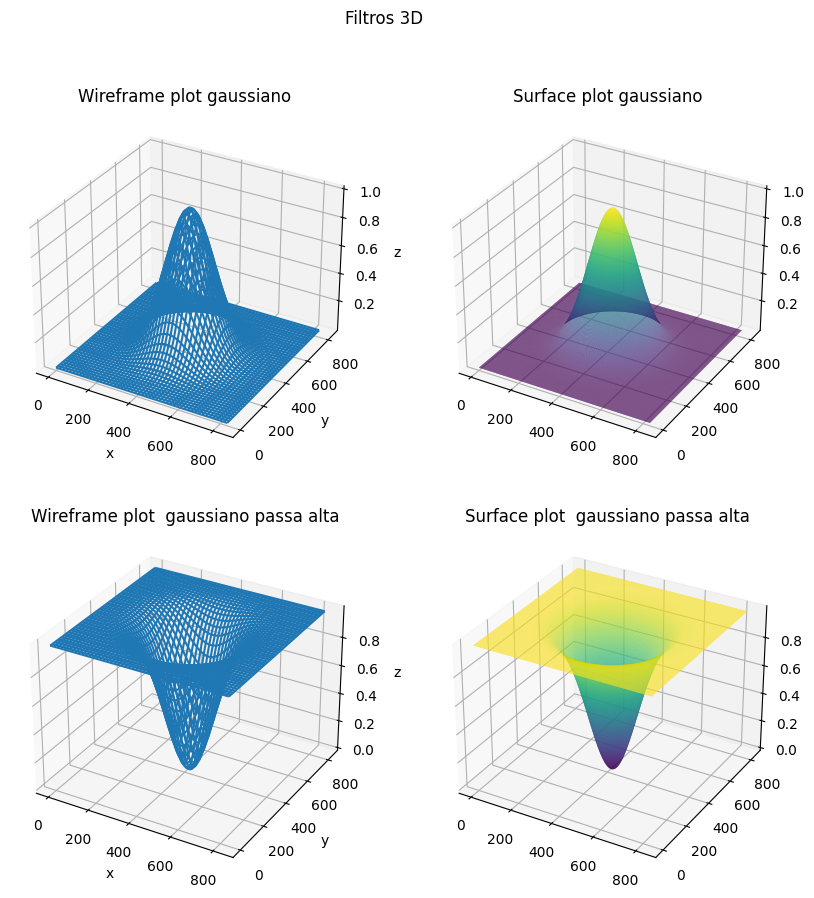

In [ ]:
## FILTROS GAUSSIANO
## -- Seu código começa AQUI -- ##

plot3D([GAUSSIANO(), filtro_passa_alta_gaussiano],["gaussiano"," gaussiano passa alta"])#utilizando a função para o plot 3D dos filtros gaussianos

## -- Seu código termina AQUI -- ##

### 2) Filtros PASSA-BANDA E REJEITA-BANDA no domínio da frequência (5.0/10.0)

Existem algumas aplicações nas quais é interessante processar bandas específicas de frequências. Para tanto, utiliza-se filtros conhecidos como filtros rejeita-banda e passa-banda. Assim como mostrado anteriormente, a transição pode ser feita de modo abrupto ou suavizado. As equações a seguir referem-se a filtros rejeita-banda (BR de *bandreject*):

Filtro rejeita-baixa IDEAL:

$$ H_{BRideal}(u,v) = 0, \;se\;D_0 - \frac{W}{2} \le D \le D_0 + \frac{W}{2}$$<br/>
$$ H_{BRideal}(u,v) = 1,\; para\;todos\;outros\;casos$$<br/>

Filtro rejeita-baixa BUTTERWORTH:

$$ H_{BRButterworth}(u,v) = \frac{1}{1+\big[\frac{D \cdot W}{D^2-D_0^2}\big]^{2n}}$$<br/>

Filtro rejeita-baixa GAUSSIANO:

$$ H_{BRGaussiano}(u,v) = 1-e^{-\big(\frac{D^2-D_0^2}{D \cdot W}\big)^2}$$<br/>


Um filtro passa-banda (BP de *bandpass*) é obtido a partir do respectivo rejeita-banda, conforme equação abaixo:

$$ H_{BP}(u,v) = 1 - H_{BR}(u,v)$$<br/>



**Exercício.** Considerando que a imagem 'arvore_mod.tif' foi digitalizada com **resolução de 400DPI**, realize as seguintes tarefas: (5.0/10.0)

**a.** Visualize a imagem original e o espectro de Fourier (domínio da frequência). **Lembre-se do padding.**

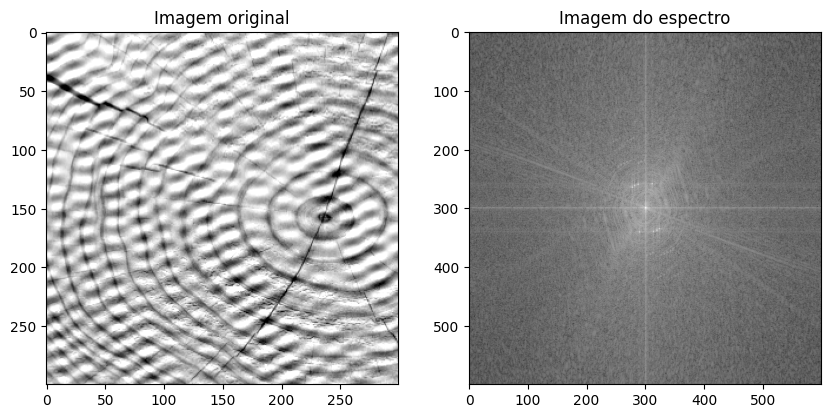

In [ ]:
## -- Seu código começa AQUI -- ##

img =cv.imread("arvore_mod.tif", cv.IMREAD_UNCHANGED)

M = img.shape[0]
N = img.shape[1]

Mf = 2*M
Nf = 2*N

f = np.fft.fft2(img,s=(Mf,Nf))
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1.)


plot([img, magnitude_spectrum],["Imagem original", "Imagem do espectro"])
## -- Seu código termina AQUI -- ##

**b.** Encontre o centro do espectro de frequências. Plote um recorte central. Encontre o tamanho de recorte que permita melhor visualização dos pontos mais evidentes simétricos em relação ao centro.

A posição do centro é dada por (300, 300) e seu valor corresponde a 332.4368781830268


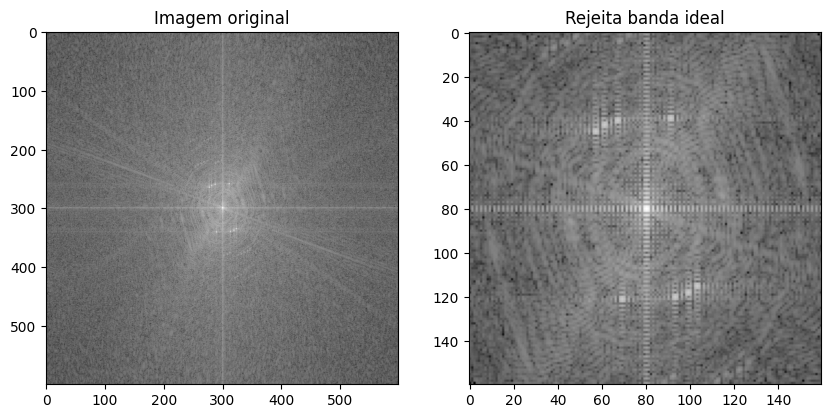

In [ ]:
## -- Seu código começa AQUI -- ##
cx = int(2*M/2) #olhar o do espectro
cy = int(2*N/2) #olhar o do espectro

print(f"A posição do centro é dada por {cx,cy} e seu valor corresponde a {magnitude_spectrum[cx][cy]}")

espectro_recortado = magnitude_spectrum[220:380,220:380]
plot([magnitude_spectrum,espectro_recortado],["Imagem original", "Rejeita banda ideal"])

## -- Seu código termina AQUI -- ##


**c.** Crie um **filtro rejeita-banda circular do tipo "ideal"** para ser aplicado à imagem. Os parâmetros de frequência de corte em ciclos/mm e a largura de banda em ciclos/mm devem ser escolhidos preservando ao máximo o conteúdo da imagem. Utilize a referência do exercício "b" para auxiliar na escolha dos parâmetros e comente justificando.

Crie um **filtro passa-banda circular do tipo "ideal"** com os mesmos parâmetros de frequência de corte para visualizar as componentes removidas.

Comente o resultado obtido.

30.48


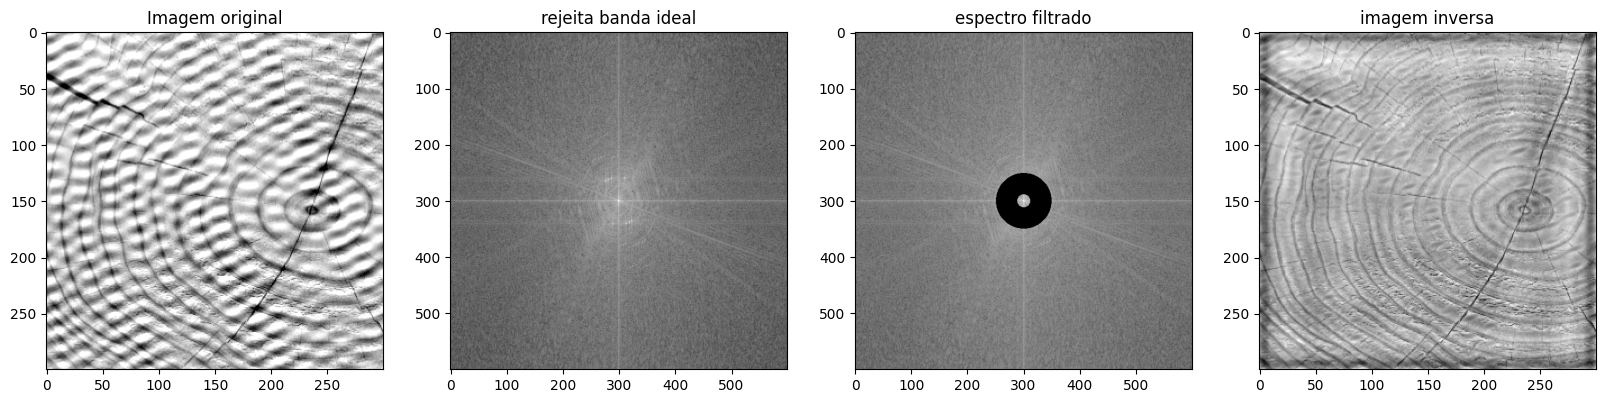

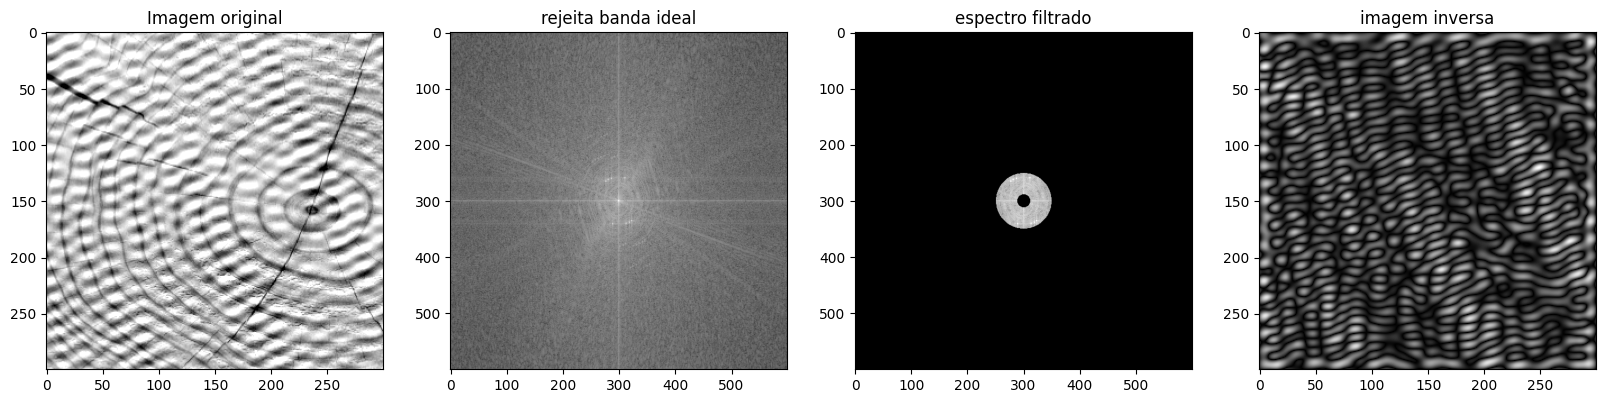

In [ ]:
## -- Seu código começa AQUI -- ##
dx = 25.4/400
du =1/(2*dx*M)
D0 = 0.8/du
print(D0)
W = 38

def rejeita_banda():
  filtro = np.zeros((Mf, Nf))
  filtro = 1 -filtro
  for x in range(0, Mf):
    for y in range (0, Nf):
      D = np.sqrt((x-cx)**2+(y-cy)**2)
      if (D0-W/2)<=D<=(D0+W/2):
        filtro[x,y] = 0
  return filtro

def passa_banda():
  filtro = 1-rejeita_banda()
  return filtro

plot([img, magnitude_spectrum,20*np.log(np.abs(fshift*rejeita_banda())+1.), calcula_inversa(rejeita_banda())],["Imagem original", "rejeita banda ideal", "espectro filtrado", "imagem inversa"])
plot([img, magnitude_spectrum,20*np.log(np.abs(fshift*passa_banda())+1.), calcula_inversa(passa_banda())],["Imagem original", "rejeita banda ideal", "espectro filtrado", "imagem inversa"])
## -- Seu código termina AQUI -- ##

# Comentários: A imagem filtrada obtida a partir do rejeita banda, foi uma imagem com poucas senoides na direção da diagonal, ficando mais clara para ver o "tronco" da árvore.
#Quando a imagem é filtrada com o passa banda, o que é obtido é o padrão senoidal que estava distorcendo a imagem original.

**d.** Visualize os filtros PASSA-BANDA e REJEITA-BANDA criados em plots 3D (Wireframe e Surface).

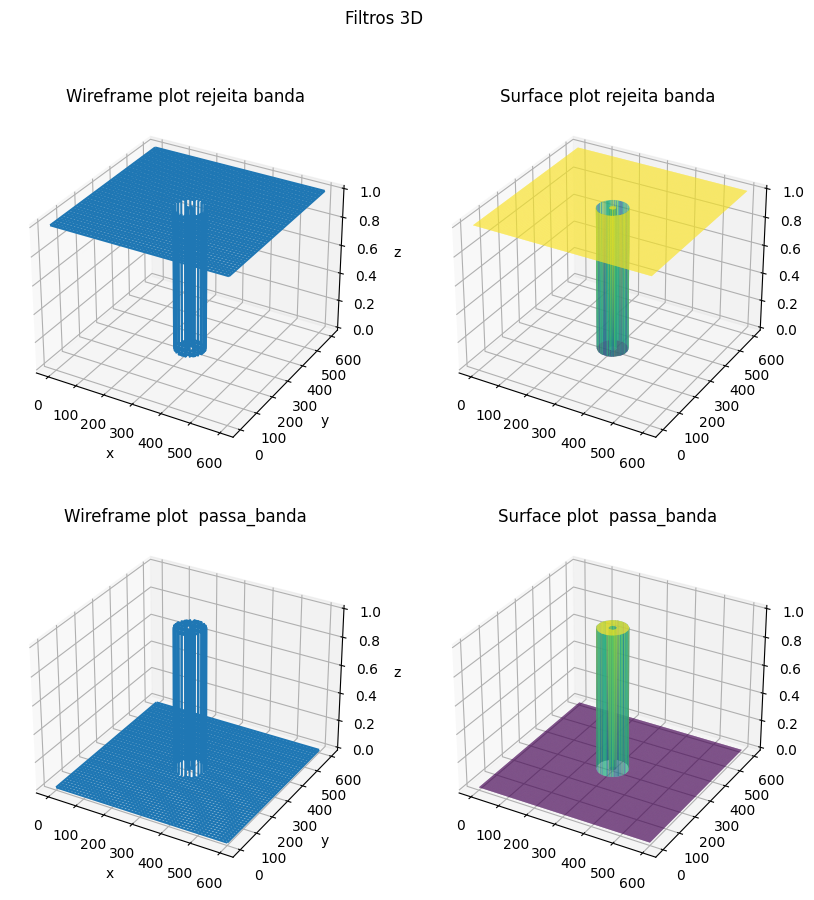

In [ ]:
## FILTROS IDEAIS
## -- Seu código começa AQUI -- ##
plot3D([rejeita_banda(), passa_banda()],["rejeita banda"," passa_banda"]) #plot3D de rejeita banda e passa banda
## -- Seu código termina AQUI -- ##